/usr/local/var/pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/var/pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in double_scalars


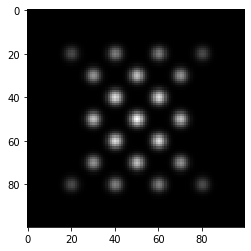

In [1]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fftn, ifftn
from matplotlib.colors import Normalize
import os
import sys
import random

fig = plt.figure()
hkl = []
#parameter
a = 6.582
b = a
c = a
alpha = np.pi/2
beta = alpha
ganma = alpha

lamb = 1.5418

sigma = 1/20

incident = [0, 0, 1]

B = 2.0

sinthetalamb = 0.2
param_na = [[4.7626, 3.285], [3.1736, 8.8422], [1.2674, 0.3136], [1.1128, 129.424]]
x = [0.0, 0.5, 1.0]
cp = 0.676

G = [[a**2, a*b*np.cos(ganma), a*c*np.cos(beta)], [b*a*np.cos(ganma), b**2, b*a*np.cos(alpha)], [c*a*np.cos(beta), c*b*np.cos(alpha), c**2]]
invG = np.linalg.inv(G)

r_na = []
df_na = pd.read_csv("./pos.csv", encoding="UTF-8")
x = list(df_na['x'])
y = list(df_na['y'])
z = list(df_na['z'])
for i in range(4):
    r_na.append([x[i], y[i], z[i]])

df = pd.read_csv("./hkl.csv", encoding="UTF-8")
h = list(df['h'])
k = list(df['k'])
l = list(df['l'])

def f_atm(param, sinthetalamb):
    fa = 0
    for i in range(3):
        fa = fa + param[i][0]*np.exp((-param[i][1]*(sinthetalamb**2)))
    
    fa = fa + cp
    fa = fa*np.exp(-B*(sinthetalamb)**2)
    return fa

def f_func(r, h, k, l, param, sinthetalamb):
    rea = 0
    ima = 0
    fatm = f_atm(param, sinthetalamb)
    for j in r:
        rea = rea + np.cos(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        ima = ima + np.sin(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        f = fatm*(complex(rea, ima))
    
    return f

def gaussian(theta, lamb):
    gauss = (1/(2*np.pi*sigma))*np.exp(-(theta**2 + lamb**2)/(2*sigma))
    return gauss

I = np.zeros((100, 100))

f_result = np.zeros(800)
t2 = np.arange(0, 80, 0.1)
multiple = 1

for i in range(len(h)):
    hkl = [h[i], k[i], l[i]]
    thkl = np.transpose(hkl)
    dk = 1/((np.matmul(np.matmul(invG, thkl), hkl))**(1/2))
    sinthetak = lamb/(2*dk)
    thetak = np.rad2deg(np.arcsin(sinthetak))
    
    Fna = f_func(r_na, h[i], k[i], l[i], param_na, sinthetak/lamb)
    F = Fna
    
    if(f_result[int(round(2*thetak, 0)*10)] != 0):
        f_result[int(round(2*thetak, 0)*10)] = f_result[int(round(2*thetak, 0)*10)] + abs(F)**2
    else:
        f_result[int(round(2*thetak, 0)*10)] = abs(F)**2
    
    if(np.dot(hkl, incident) == 0):
        I[49 - hkl[0]*10][49 + hkl[1]*10] = abs(F)**2

t, l = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))
g = gaussian(t, l)
N_neighbors = scipy.signal.convolve2d(I, g, boundary='wrap', mode='same')
plt.imshow(N_neighbors, interpolation="nearest", cmap=plt.cm.gray)

/usr/local/var/pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in double_scalars


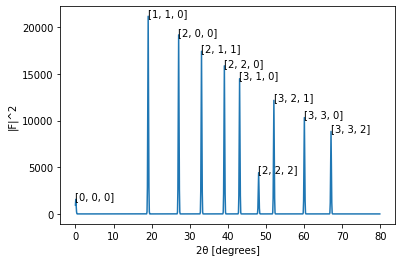

In [4]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fftn, ifftn
from matplotlib.colors import Normalize
import os
import sys
import random

hkl = []
#parameter
a = 6.582
b = a
c = a
alpha = np.pi/2
beta = alpha
ganma = alpha

lamb = 1.5418

sigma = 1/10

incident = [0, 0, 1]

sinthetalamb = 0.2
param_na = [[4.7626, 3.285], [3.1736, 8.8422], [1.2674, 0.3136], [1.1128, 129.424]]
x = [0.0, 0.5, 1.0]
cp = 0.676

G = [[a**2, a*b*np.cos(ganma), a*c*np.cos(beta)], [b*a*np.cos(ganma), b**2, b*a*np.cos(alpha)], [c*a*np.cos(beta), c*b*np.cos(alpha), c**2]]
invG = np.linalg.inv(G)

r_na = []
df_na = pd.read_csv("./pos.csv", encoding="UTF-8")
x = list(df_na['x'])
y = list(df_na['y'])
z = list(df_na['z'])
for i in range(4):
    r_na.append([x[i], y[i], z[i]])

df = pd.read_csv("./hkl.csv", encoding="UTF-8")
h = list(df['h'])
k = list(df['k'])
l = list(df['l'])

def f_atm(param, sinthetalamb):
    fa = 0
    for i in range(3):
        fa = fa + param[i][0]*np.exp((-param[i][1]*(sinthetalamb**2)))
    
    fa = fa + cp
    return fa

def f_func(r, h, k, l, param, sinthetalamb):
    rea = 0
    ima = 0
    fatm = f_atm(param, sinthetalamb)
    for j in r:
        rea = rea + np.cos(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        ima = ima + np.sin(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        f = fatm*(complex(rea, ima))
    
    return f

def gaussian(theta, sigma):
    gauss = np.exp(-(theta**2)/(2*sigma**2))
    return gauss

f_result = np.zeros(800)
t2 = np.arange(0, 80, 0.1)
t2_hkl = []

for i in range(len(h)):
    hkl = [h[i], k[i], l[i]]
    thkl = np.transpose(hkl)
    dk = 1/((np.matmul(np.matmul(invG, thkl), hkl))**(1/2))
    sinthetak = lamb/(2*dk)
    thetak = np.rad2deg(np.arcsin(sinthetak))
    
    Fna = f_func(r_na, h[i], k[i], l[i], param_na, sinthetak/lamb)
    F = Fna
    
    theta2k = int(round(2*thetak, 0)*10) 
    
    if(f_result[theta2k] != 0):
        f_result[theta2k] = f_result[theta2k] + abs(F)**2
        continue
    else:
        f_result[theta2k] = abs(F)**2
        
    if(abs(F)**2 >= 400):
        t2_hkl.append([int(round(2*thetak, 0)), hkl])
        

t = np.arange(-4, 4, 0.1)
g = gaussian(t, sigma) 
result = np.convolve(f_result, g, 'same')

fig = plt.figure()
plt.xlabel("2θ [degrees]")
plt.ylabel("|F|^2")

for i in t2_hkl:
    plt.text(i[0], f_result[i[0]*10], i[1])

plt.plot(t2, result)

/usr/local/var/pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in double_scalars


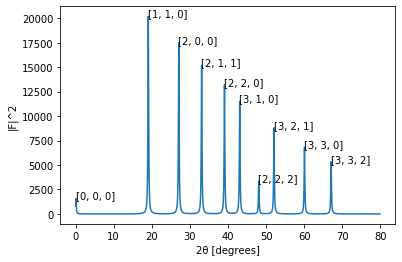

In [5]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fftn, ifftn
from matplotlib.colors import Normalize
import os
import sys
import random

hkl = []

#parameter
a = 6.582
b = a
c = a
alpha = np.pi/2
beta = alpha
ganma = alpha

lamb = 1.5418

sigma = 1/10
gamma = 1/10

B = 2.0

param_na = [[4.7626, 3.285], [3.1736, 8.8422], [1.2674, 0.3136], [1.1128, 129.424]]
x = [0.0, 0.5, 1.0]
cp = 0.676

#init matrix
G = [[a**2, a*b*np.cos(ganma), a*c*np.cos(beta)], [b*a*np.cos(ganma), b**2, b*a*np.cos(alpha)], [c*a*np.cos(beta), c*b*np.cos(alpha), c**2]]
invG = np.linalg.inv(G)

#input data
r_na = []
df_na = pd.read_csv("./pos.csv", encoding="UTF-8")
x = list(df_na['x'])
y = list(df_na['y'])
z = list(df_na['z'])
for i in range(4):
    r_na.append([x[i], y[i], z[i]])

df = pd.read_csv("./hkl.csv", encoding="UTF-8")
h = list(df['h'])
k = list(df['k'])
l = list(df['l'])

#functions
def f_atm(param, sinthetalamb):
    fa = 0
    for i in range(3):
        fa = fa + param[i][0]*np.exp((-param[i][1]*(sinthetalamb**2)))
    
    fa = fa + cp
    fa = fa*np.exp(-B*(sinthetalamb)**2)
    return fa

def f_func(r, h, k, l, param, sinthetalamb):
    rea = 0
    ima = 0
    fatm = f_atm(param, sinthetalamb)
    for j in r:
        rea = rea + np.cos(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        ima = ima + np.sin(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        f = fatm*(complex(rea, ima))
    
    return f

def lorentzian(theta, gamma):
    lorentz = 1/(1 + (theta/gamma)**2)
    return lorentz

f_result = np.zeros(800)
t2 = np.arange(0, 80, 0.1)
t2_hkl = []

for i in range(len(h)):
    hkl = [h[i], k[i], l[i]]
    thkl = np.transpose(hkl)
    dk = 1/((np.matmul(np.matmul(invG, thkl), hkl))**(1/2))
    sinthetak = lamb/(2*dk)
    thetak = np.rad2deg(np.arcsin(sinthetak))
    
    Fna = f_func(r_na, h[i], k[i], l[i], param_na, sinthetak/lamb)
    F = Fna
    
    theta2k = int(round(2*thetak, 0)*10) 
    
    if(f_result[theta2k] != 0):
        f_result[theta2k] = f_result[theta2k] + abs(F)**2
        continue
    else:
        f_result[theta2k] = abs(F)**2
        
    if(abs(F)**2 >= 100):
        t2_hkl.append([int(round(2*thetak, 0)), hkl])
        

t = np.arange(-4, 4, 0.1)
l = lorentzian(t, gamma)
result = np.convolve(f_result, l, 'same')


fig = plt.figure()
plt.xlabel("2θ [degrees]")
plt.ylabel("|F|^2")

for i in t2_hkl:
    plt.text(i[0], f_result[i[0]*10], i[1])

plt.plot(t2, result)


/usr/local/var/pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in double_scalars


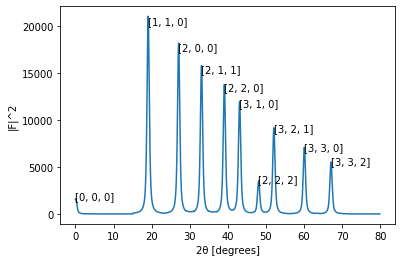

In [6]:
%matplotlib inline
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fftn, ifftn
from matplotlib.colors import Normalize
import os
import sys
import random

hkl = []

#parameter
a = 6.582
b = a
c = a
alpha = np.pi/2
beta = alpha
ganma = alpha

lamb = 1.5418

sigma = 1/10
gamma = 1/10

B = 2.0
Hg = 1/5
Hl = 1/5

param_na = [[4.7626, 3.285], [3.1736, 8.8422], [1.2674, 0.3136], [1.1128, 129.424]]
x = [0.0, 0.5, 1.0]
cp = 0.676

#init matrix
G = [[a**2, a*b*np.cos(ganma), a*c*np.cos(beta)], [b*a*np.cos(ganma), b**2, b*a*np.cos(alpha)], [c*a*np.cos(beta), c*b*np.cos(alpha), c**2]]
invG = np.linalg.inv(G)

#input data
r_na = []
df_na = pd.read_csv("./pos.csv", encoding="UTF-8")
x = list(df_na['x'])
y = list(df_na['y'])
z = list(df_na['z'])
for i in range(4):
    r_na.append([x[i], y[i], z[i]])

df = pd.read_csv("./hkl.csv", encoding="UTF-8")
h = list(df['h'])
k = list(df['k'])
l = list(df['l'])

#functions
def f_atm(param, sinthetalamb):
    fa = 0
    for i in range(3):
        fa = fa + param[i][0]*np.exp((-param[i][1]*(sinthetalamb**2)))
    
    fa = fa + cp
    fa = fa*np.exp(-B*(sinthetalamb)**2)
    return fa

def f_func(r, h, k, l, param, sinthetalamb):
    rea = 0
    ima = 0
    fatm = f_atm(param, sinthetalamb)
    for j in r:
        rea = rea + np.cos(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        ima = ima + np.sin(2*np.pi*(j[0]*h+j[1]*k+j[2]*l))
        f = fatm*(complex(rea, ima))
    
    return f

def voigt(theta, Hg, Hl):
    z = (theta + 1j*Hl)/(Hg * np.sqrt(2.0))
    w = scipy.special.wofz(z)
    v = (w.real)/(Hg * np.sqrt(2.0*np.pi))
    
    return v

f_result = np.zeros(800)
t2 = np.arange(0, 80, 0.1)
t2_hkl = []

for i in range(len(h)):
    hkl = [h[i], k[i], l[i]]
    thkl = np.transpose(hkl)
    dk = 1/((np.matmul(np.matmul(invG, thkl), hkl))**(1/2))
    sinthetak = lamb/(2*dk)
    thetak = np.rad2deg(np.arcsin(sinthetak))
    
    Fna = f_func(r_na, h[i], k[i], l[i], param_na, sinthetak/lamb)
    F = Fna
    
    theta2k = int(round(2*thetak, 0)*10) 
    
    if(f_result[theta2k] != 0):
        f_result[theta2k] = f_result[theta2k] + abs(F)**2
        continue
    else:
        f_result[theta2k] = abs(F)**2
        
    if(abs(F)**2 >= 100):
        t2_hkl.append([int(round(2*thetak, 0)), hkl])
        

t = np.arange(-4, 4, 0.1)
l = voigt(t, Hg, Hl)
result = np.convolve(f_result, l, 'same')


fig = plt.figure()
plt.xlabel("2θ [degrees]")
plt.ylabel("|F|^2")

for i in t2_hkl:
    plt.text(i[0], f_result[i[0]*10], i[1])

plt.plot(t2, result)